# Name: Doris Chen
#### Test 1B Data Mining Winter 2020-21

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. (10 pts) Cleaning:

In [2]:
#A1 START ENTER CODE HERE (DO NOT MODIFY THIS LINE)



#A2 END ENTER CODE HERE  (DO NOT MODIFY THIS LINE)
df = pd.read_csv('restaurant.csv')
df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,25.89,5.16,Male,Yes,Sat,Dinner,4
1,23.68,NaN,Male,No,Sun,Dinner,2
2,12.60,1.00,Male,Yes,Sat,Dinner,2


In [3]:
#B1 START ENTER CODE HERE (DO NOT MODIFY THIS LINE)

df1=df.dropna(axis=0)

#B2 END ENTER CODE HERE  (DO NOT MODIFY THIS LINE)
df1= df1.replace({'tip':-999},0)

In [4]:
#C THIS CELL IS FOR GRADING ONLY (DO NOT MODIFY)
df1.head()

,total_bill,tip,sex,smoker,day,time,size
0,25.89,5.16,Male,Yes,Sat,Dinner,4
2,12.60,1.00,Male,Yes,Sat,Dinner,2
4,18.43,3.00,Male,No,Sun,Dinner,4
6,38.01,3.00,Male,Yes,Sat,Dinner,4
7,16.27,2.50,Female,Yes,Fri,Lunch,2


## 2(a) (10 pts) Binning:

In [5]:
#D1 START ENTER CODE HERE (DO NOT MODIFY THIS LINE)



#D2 END ENTER CODE HERE  (DO NOT MODIFY THIS LINE)
df = pd.read_csv('seats.csv')
df.head(3)

,Price,Advertising,ShelveLoc,Urban,US,Sales
0,120,11,Bad,Yes,Yes,9.50
1,83,16,Good,Yes,Yes,11.22
2,80,10,Medium,Yes,Yes,10.06


In [6]:
#E1 START ENTER CODE HERE (DO NOT MODIFY THIS LINE)
p = pd.qcut(df.Price, [0,0.25,0.75,1],labels = ['low','medium','high'])
ad = pd.cut(df.Advertising, [0,1,15,30],labels = ['low','medium','high'])
df2a=df
df2a['p_bin']=p
df2a['ad_bin']=ad
df2a.head(5)
#E2 END ENTER CODE HERE  (DO NOT MODIFY THIS LINE)

,Price,Advertising,ShelveLoc,Urban,US,Sales,p_bin,ad_bin
0,120,11,Bad,Yes,Yes,9.50,medium,medium
1,83,16,Good,Yes,Yes,11.22,low,high
2,80,10,Medium,Yes,Yes,10.06,low,medium
3,97,4,Medium,Yes,Yes,7.40,low,medium
4,128,3,Bad,Yes,No,4.15,medium,medium


In [7]:
#F THIS CELL IS FOR GRADING ONLY (DO NOT MODIFY)

## 2(b) (10 pts) Merging:

In [8]:
#G1 START ENTER CODE HERE (DO NOT MODIFY THIS LINE)



#G2 END ENTER CODE HERE  (DO NOT MODIFY THIS LINE)
df_demographics = pd.read_csv('demographics.csv')
df_demographics.head(3)

,Urban,US,Income,Population,Age
0,No,Yes,71.0,285.0,52.0
1,Yes,No,67.0,247.0,53.0
2,Yes,Yes,70.0,266.0,54.0


In [9]:
#H1 START ENTER CODE HERE (DO NOT MODIFY THIS LINE)
df2b=df.merge(df_demographics, left_on=['Urban','US'], right_on=['Urban','US'])

df2b.head(3)

#H2 END ENTER CODE HERE  (DO NOT MODIFY THIS LINE)

,Price,Advertising,ShelveLoc,Urban,US,Sales,p_bin,ad_bin,Income,Population,Age
0,120,11,Bad,Yes,Yes,9.50,medium,medium,70.0,266.0,54.0
1,83,16,Good,Yes,Yes,11.22,low,high,70.0,266.0,54.0
2,80,10,Medium,Yes,Yes,10.06,low,medium,70.0,266.0,54.0


In [10]:
#I THIS CELL IS FOR GRADING ONLY (DO NOT MODIFY)

## 2(c) (10 pts) Grouping and  Plotting:

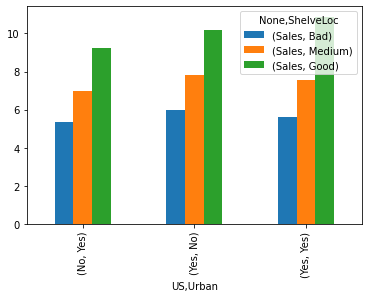

In [11]:
#J1 START ENTER CODE HERE (DO NOT MODIFY THIS LINE)
df2b['ShelveLoc']=pd.Categorical(df2b['ShelveLoc'], categories = ['Bad','Medium','Good'],ordered=True)
df2c = pd.pivot_table(df2b, index = ['US','Urban'],values = ['Sales'],columns='ShelveLoc', aggfunc='mean')
df2c.plot.bar()

#J2 END ENTER CODE HERE  (DO NOT MODIFY THIS LINE)